<a href="https://colab.research.google.com/github/Nikita921999/project/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [ ]:
dataset = pd.read_csv('/content/Loan_Data.csv')

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dataset.shape

(614, 13)

In [ ]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
dataset.drop('Loan_ID', axis=1, inplace=True)
dataset.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
cols = ['LoanAmount','Loan_Amount_Term','Credit_History','Gender','Married','Self_Employed','Dependents']

for i in cols:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
print(dataset.Property_Area.unique())
print(dataset.Education.unique())
print(dataset.Self_Employed.unique())

['Urban' 'Rural' 'Semiurban']
['Graduate' 'Not Graduate']
['No' 'Yes']


In [ ]:
dataset.Gender.replace({"Male":0, "Female":1}, inplace=True)
dataset.Married.replace({"No":0, "Yes":1}, inplace=True)
dataset.Education.replace({"Not Graduate":0, "Graduate":1}, inplace=True)
dataset.Self_Employed.replace({"No":0, "Yes":1}, inplace=True)
dataset.Property_Area.replace({"Rural":0, "Urban":1, "Semiurban":2}, inplace=True)
dataset.Loan_Status.replace({"N":0, "Y":1}, inplace=True)
dataset.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
585,0,1,1,1,0,4283,3000.0,172.0,84.0,1.0,0,0
191,0,0,0,1,0,12000,0.0,164.0,360.0,1.0,2,0
608,0,1,0,1,0,3232,1950.0,108.0,360.0,1.0,0,1
155,0,1,3+,1,0,39999,0.0,600.0,180.0,0.0,2,1
363,0,1,0,1,0,3013,3033.0,95.0,300.0,1.0,1,1


In [ ]:
# loan amount for months :
dataset.Loan_Amount_Term=dataset.Loan_Amount_Term / 12
dataset.Loan_Amount_Term = dataset.Loan_Amount_Term.astype('int')
dataset.sample(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,1,0,3+,1,0,416,41667.0,350.0,15,1.0,1,0
67,0,1,1,1,0,10750,0.0,312.0,30,1.0,1,1
181,0,0,0,1,0,1916,5063.0,67.0,30,1.0,0,0
336,0,1,1,1,0,5250,688.0,160.0,30,1.0,0,1
592,0,0,3+,1,1,9357,0.0,292.0,30,1.0,2,1
563,0,0,0,0,1,5800,0.0,132.0,30,1.0,2,1


In [ ]:
dataset.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
dataset.Dependents = dataset.Dependents.str.split('+').str[0]

In [ ]:
dataset.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
10,0,1,2,1,0,3200,700.0,70.0,30,1.0,1,1
387,0,1,0,0,0,3010,3136.0,120.0,30,0.0,1,0
554,0,1,0,1,0,3593,4266.0,132.0,15,0.0,0,0
350,0,1,0,1,0,9083,0.0,228.0,30,1.0,2,1
563,0,0,0,0,1,5800,0.0,132.0,30,1.0,2,1


In [ ]:
dataset.Loan_Amount_Term.unique()

array([30, 10, 20, 15,  5, 25, 40,  3,  7,  1])

In [ ]:
# below 6 month, can't provide loan
dataset.drop(dataset[dataset.Loan_Amount_Term <= 6].index, inplace=True)

In [ ]:
dataset.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,120.0,30,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.0,30,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,30,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.0,30,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.0,30,1.0,1,1
5,0,1,2,1,1,5417,4196.0,267.0,30,1.0,1,1
6,0,1,0,0,0,2333,1516.0,95.0,30,1.0,1,1
7,0,1,3,1,0,3036,2504.0,158.0,30,0.0,2,0
8,0,1,2,1,0,4006,1526.0,168.0,30,1.0,1,1
9,0,1,1,1,0,12841,10968.0,349.0,30,1.0,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             609 non-null    int64  
 1   Married            609 non-null    int64  
 2   Dependents         609 non-null    object 
 3   Education          609 non-null    int64  
 4   Self_Employed      609 non-null    int64  
 5   ApplicantIncome    609 non-null    int64  
 6   CoapplicantIncome  609 non-null    float64
 7   LoanAmount         609 non-null    float64
 8   Loan_Amount_Term   609 non-null    int64  
 9   Credit_History     609 non-null    float64
 10  Property_Area      609 non-null    int64  
 11  Loan_Status        609 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 61.9+ KB


In [ ]:
dataset.ApplicantIncome = dataset.ApplicantIncome/100
dataset.CoapplicantIncome = dataset.CoapplicantIncome/100
dataset.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,58.49,0.00,120.0,30,1.0,1,1
1,0,1,1,1,0,45.83,15.08,128.0,30,1.0,0,0
2,0,1,0,1,1,30.00,0.00,66.0,30,1.0,1,1
3,0,1,0,0,0,25.83,23.58,120.0,30,1.0,1,1
4,0,0,0,1,0,60.00,0.00,141.0,30,1.0,1,1


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

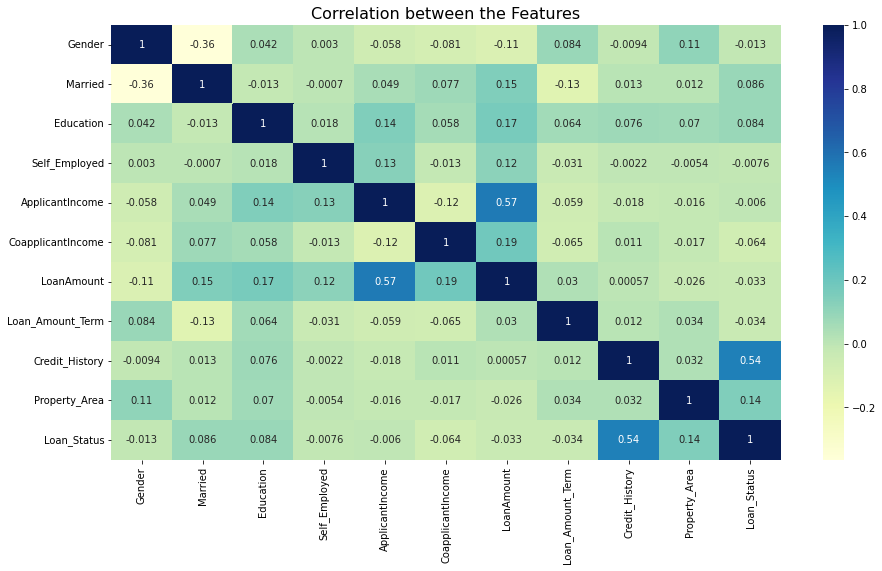

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

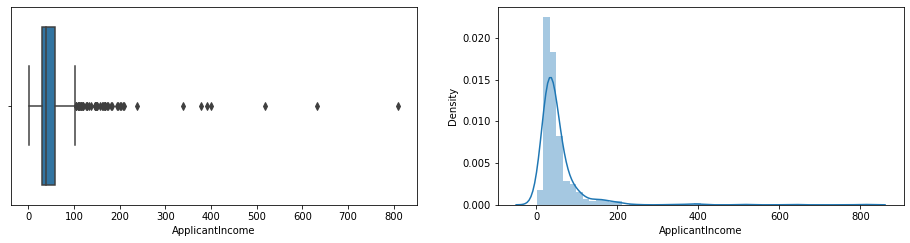

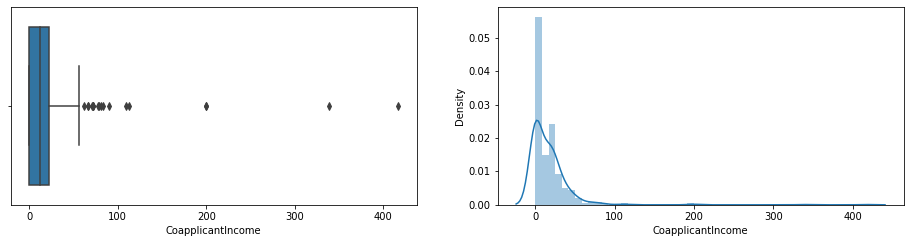

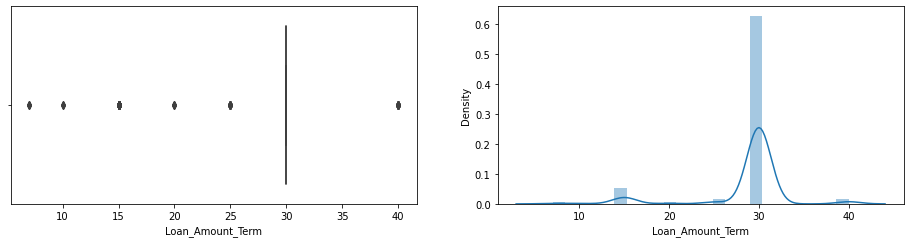

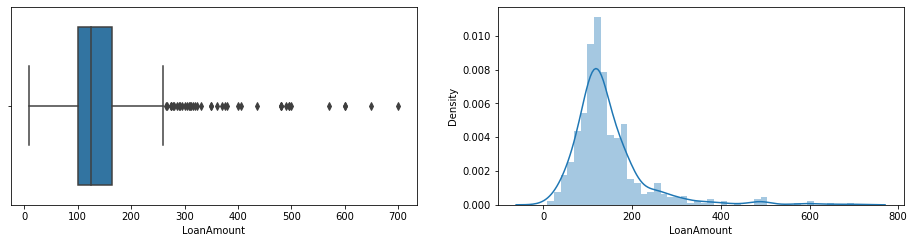

In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term', 'LoanAmount']

for i in cols:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(dataset[i])
    plt.subplot(2,2,d)
    sns.distplot(dataset[i])
    c=c+2
    d=d+1

In [ ]:
dataset.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,58.49,0.00,120.0,30,1.0,1,1
1,0,1,1,1,0,45.83,15.08,128.0,30,1.0,0,0
2,0,1,0,1,1,30.00,0.00,66.0,30,1.0,1,1


In [ ]:
def outliers_shape(col_name):
    try :
            # Finding the IQR
            percentile25 = dataset[col_name].quantile(0.25)
            percentile75 = dataset[col_name].quantile(0.75)
            iqr = percentile75 - percentile25
            
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
            
            
            # Finding Outliers
            size = dataset[dataset[col_name] > upper_limit]

            print(size.shape)
            
    except Exception as e :
        print('error is : ', e)

In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(50, 12)
(18, 12)
(41, 12)


In [ ]:
def cap_outliers (col):
    percentile25 = dataset[col].quantile(0.25)
    percentile75 = dataset[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    dataset[col] = np.where(
        dataset[col] > upper_limit,
        upper_limit,
        np.where(
            dataset[col] < lower_limit,
            lower_limit,
            dataset[col]
        )
    )

In [ ]:
colss = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in colss:
    cap_outliers(i)

In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(0, 12)
(0, 12)
(0, 12)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

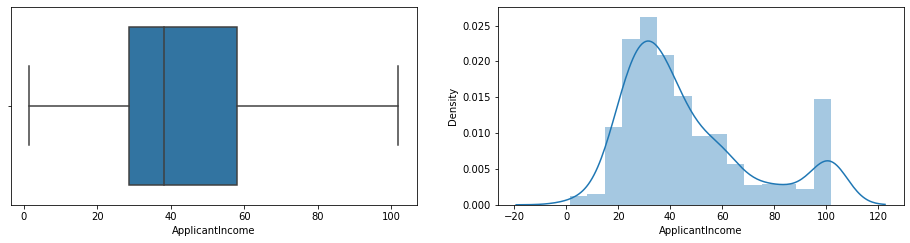

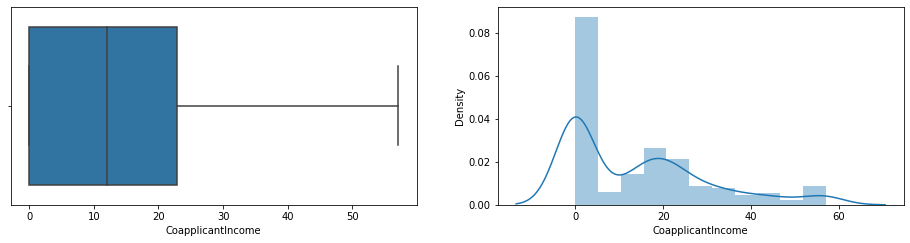

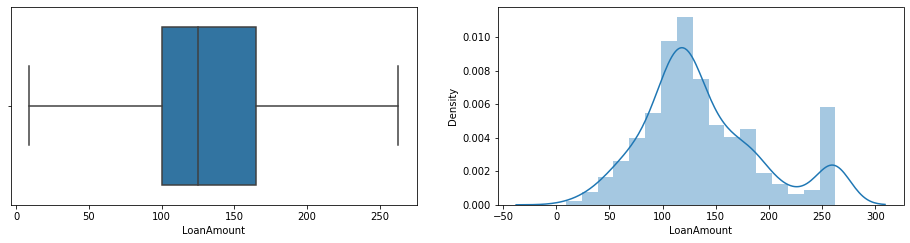

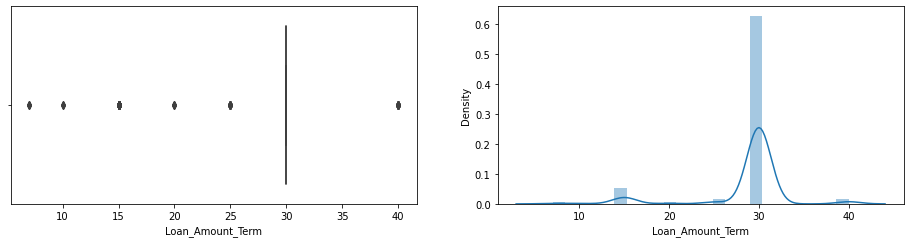

In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in cols:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(dataset[i])
    plt.subplot(2,2,d)
    sns.distplot(dataset[i])
    c=c+2
    d=d+1

In [ ]:
dataset.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
81,0,1,1,1,1,23.95,0.00,120.0,30,1.0,2,1
147,0,1,1,1,0,15.38,14.25,30.0,30,1.0,1,1
545,0,1,0,1,0,27.68,19.50,155.0,30,1.0,0,1
375,0,1,0,1,0,48.17,9.23,120.0,15,1.0,1,1
397,0,1,0,1,0,30.33,14.59,95.0,30,1.0,1,1


In [ ]:
cols = ['LoanAmount','Loan_Amount_Term','Dependents','Credit_History']
for i in cols:
    dataset[i] = dataset[i].astype('int')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             609 non-null    int64  
 1   Married            609 non-null    int64  
 2   Dependents         609 non-null    int64  
 3   Education          609 non-null    int64  
 4   Self_Employed      609 non-null    int64  
 5   ApplicantIncome    609 non-null    float64
 6   CoapplicantIncome  609 non-null    float64
 7   LoanAmount         609 non-null    int64  
 8   Loan_Amount_Term   609 non-null    int64  
 9   Credit_History     609 non-null    int64  
 10  Property_Area      609 non-null    int64  
 11  Loan_Status        609 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 61.9 KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

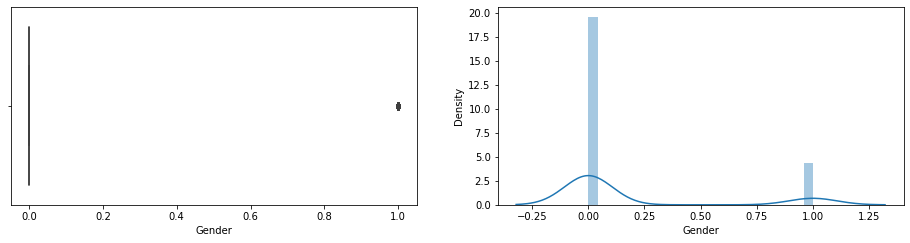

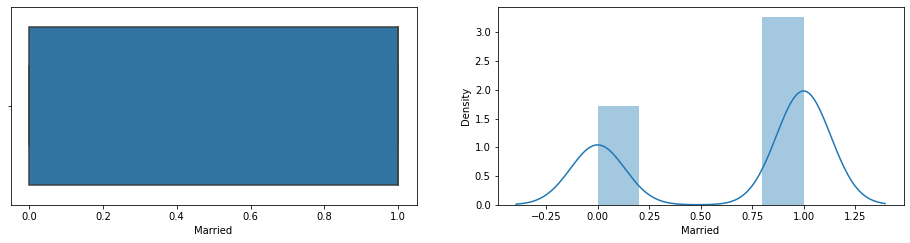

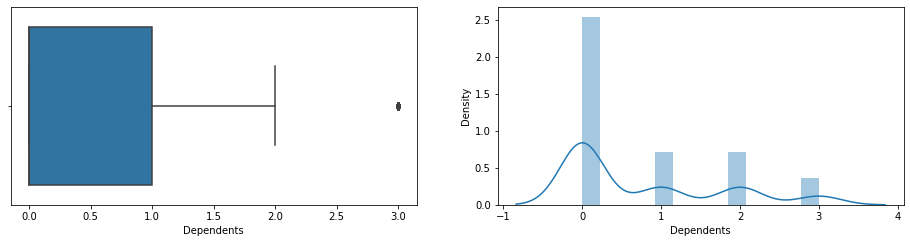

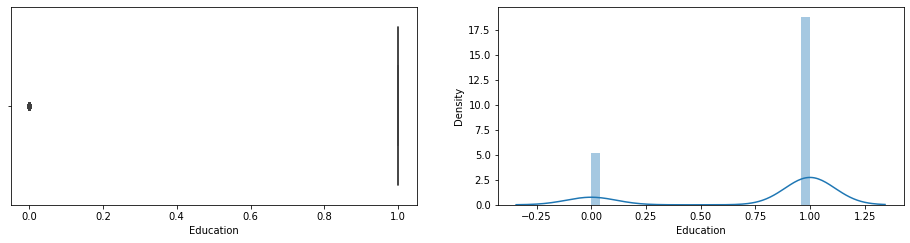

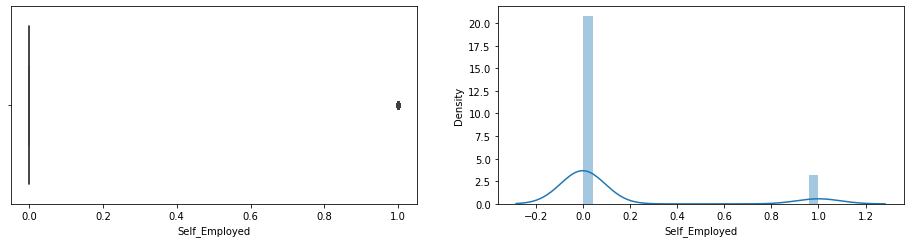

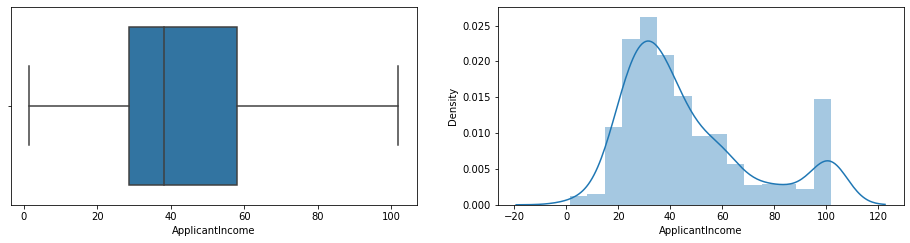

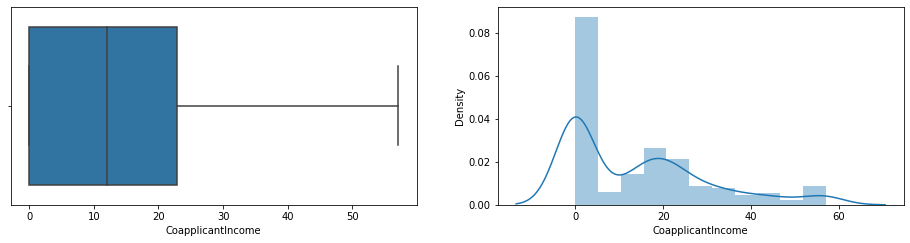

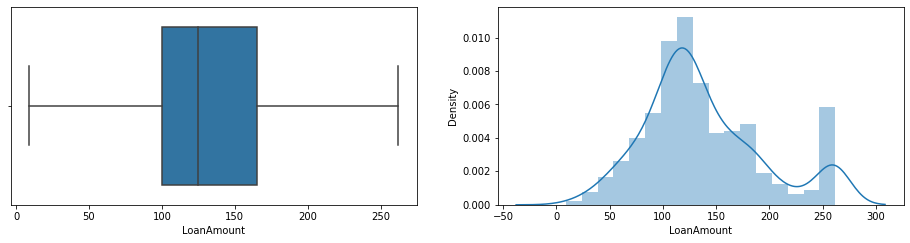

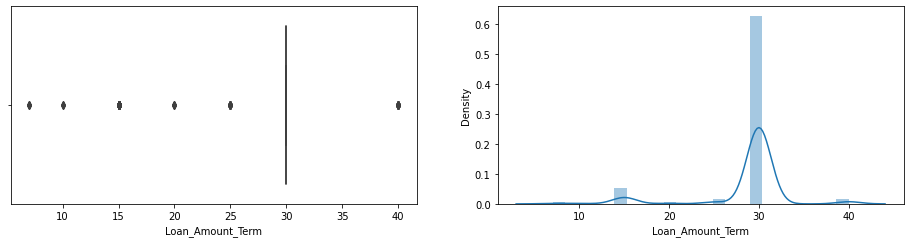

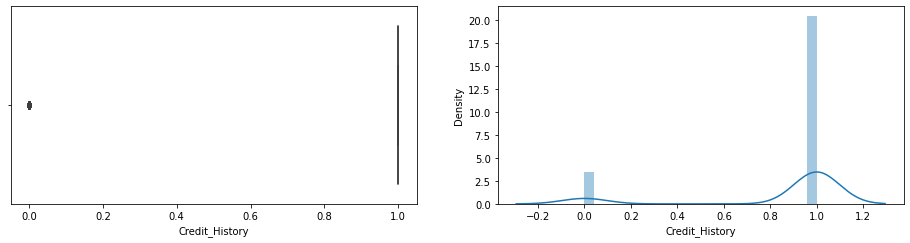

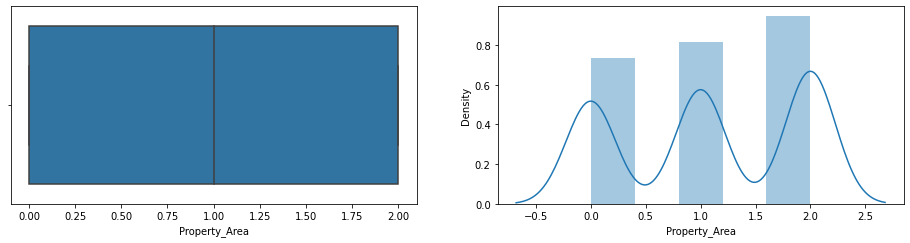

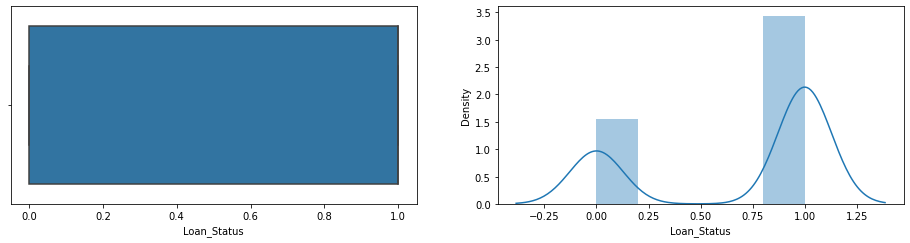

In [ ]:
for i in dataset.columns:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(dataset[i])
    plt.subplot(2,2,d)
    sns.distplot(dataset[i])
    c=c+2
    d=d+1

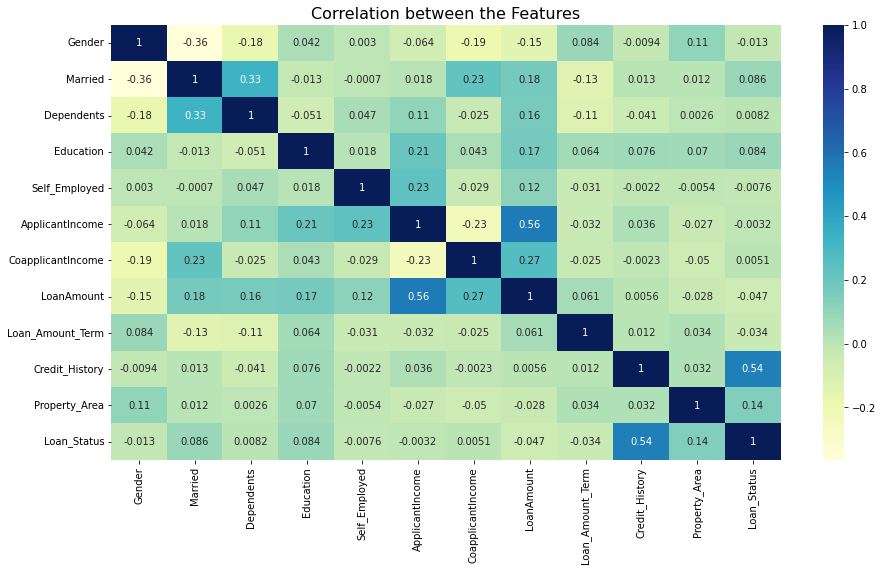

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [ ]:
dataset.drop(columns=['Dependents','Self_Employed'], inplace =True)
dataset.shape

(609, 10)

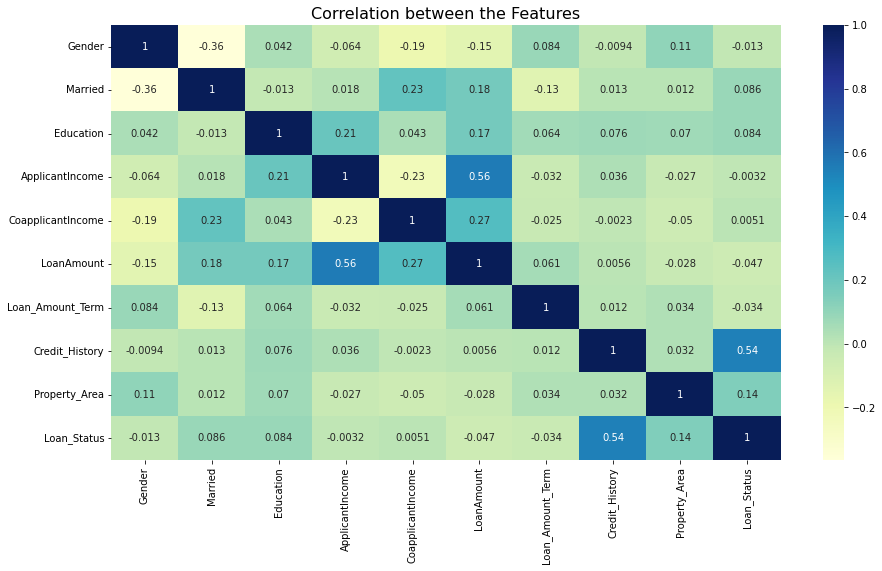

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [ ]:
data=dataset.copy()
data.head()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,58.49,0.00,120,30,1,1,1
1,0,1,1,45.83,15.08,128,30,1,0,0
2,0,1,1,30.00,0.00,66,30,1,1,1
3,0,1,0,25.83,23.58,120,30,1,1,1
4,0,0,1,60.00,0.00,141,30,1,1,1


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=('Loan_Status'))
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.07, random_state = 0)
X_train.shape, X_test.shape

((566, 9), (43, 9))

In [ ]:
print(X_train)

     Gender  Married  Education  ApplicantIncome  CoapplicantIncome  \
341       1        0          1           23.780              0.000   
612       0        1          1           75.830              0.000   
487       0        1          1          101.875              0.000   
592       0        0          1           93.570              0.000   
361       0        1          1           50.000             36.670   
..      ...      ...        ...              ...                ...   
280       0        0          0           40.530             24.260   
9         0        1          1          101.875             57.075   
362       0        1          1           47.500             23.330   
193       0        0          1           38.580              0.000   
564       0        1          1           87.990              0.000   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  
341          46                30               1              0  
612         1

In [ ]:
print(X_test)

     Gender  Married  Education  ApplicantIncome  CoapplicantIncome  \
581       0        0          1           18.360             57.075   
52        1        0          1           42.300              0.000   
535       0        0          0           25.500             20.420   
348       0        1          1           63.330             45.830   
55        0        1          1           27.080             11.670   
62        0        1          0           26.090             34.490   
351       0        0          1           87.500             41.670   
307       1        0          1           24.000             18.630   
207       0        0          0           39.750             25.310   
411       0        1          1           62.560              0.000   
309       0        1          0           76.670              0.000   
495       1        1          1           33.260              9.130   
182       0        1          1           46.000              0.000   
360   

In [ ]:
print(y_train)

341    0
612    1
487    0
592    1
361    1
      ..
280    0
9      0
362    1
193    1
564    0
Name: Loan_Status, Length: 566, dtype: int64


In [ ]:
print(y_test)

581    0
52     0
535    1
348    1
55     1
62     0
351    0
307    0
207    1
411    1
309    1
495    1
182    1
360    0
421    0
436    1
446    1
595    1
470    1
553    0
48     0
234    1
244    1
485    1
188    1
509    1
206    1
173    1
211    0
314    0
349    1
372    1
398    1
223    1
104    1
435    1
466    0
534    1
438    0
322    1
247    1
195    0
14     1
Name: Loan_Status, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score, mean_absolute_error
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))


Accuracy :  0.8604651162790697
Mean absolute error:  0.13953488372093023


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 8  6]
 [ 0 29]]


0.8604651162790697